In [1]:
import autograd.numpy as np
from autograd import grad

from tqdm import tqdm

import torch
from torch.autograd import Variable, Function

from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

from gaussian_example import gaussian
from stein_LSoperator import stein_LS

from kernels import kernels

import seaborn as sns
sns.set()

In [2]:
p_data = gaussian(dict(mu=np.array([1, 0., 0.]), sigma=np.eye(3)))
q_var = gaussian(dict(mu=np.array([0., 0., 0.]), sigma=np.eye(3)))

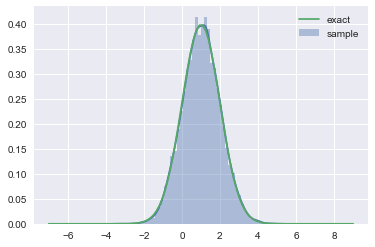

(10000, 3)

In [3]:
sam = p_data.sampler(10000)
sns.distplot(sam[:,0], label='sample')

mu = 1.0
x = np.linspace(-8 + mu, 8 + mu,100)
plt.plot(x, [p_data.density(x_, np.array([mu]), np.eye(1)) for x_ in x], label='exact')

plt.legend(loc='upper right')
plt.show()
sam.shape

In [4]:
def f(x):
    return (1 + (x**2).sum())**(-1/2)

In [5]:
test = stein_LS(dict(p=p_data, q=q_var))

In [6]:
n_samples = 2**(np.arange(5,10))
stein_val = np.array([test.stein_Operator(n_, f) for n_ in n_samples])

100%|██████████| 512/512 [00:00<00:00, 1747.67it/s]


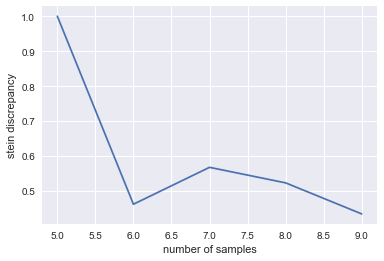

In [7]:
plt.plot(np.log2(n_samples), (stein_val))
plt.xlabel('number of samples')
plt.ylabel('stein discrepancy')
plt.show()

In [8]:
stein_val

array([ 1.00065064,  0.46124601,  0.56709415,  0.52255442,  0.43343925])

In [9]:

p_data = gaussian(dict(mu=np.array([1, 0., 0.]), sigma=np.eye(3)))
q_var = gaussian(dict(mu=np.array([0., 0., 0.]), sigma=np.eye(3)))
test = stein_LS(dict(p=p_data, q=q_var))

n_samples = 2**(np.arange(4,10))

k = kernels('rbf')
g = lambda x: k.imq(x, np.random.randn(3), c=2, beta=0.5)    
g_1 = lambda x: k.imq(x, np.random.randn(3), c=2, beta=0.5)    
g_2 = lambda x: k.imq(x, np.random.randn(3), c=2, beta=0.5)    

stein_val = np.array([test.stein_Operator(n_, g) for n_ in n_samples])
stein_val_1 = np.array([test.stein_Operator(n_, g_1) for n_ in n_samples])
stein_val_2 = np.array([test.stein_Operator(n_, g_2) for n_ in n_samples])


stein_sum = (stein_val + stein_val_1 + stein_val_2)/3
stein_sum

100%|██████████| 512/512 [00:00<00:00, 1460.26it/s]


array([ 0.46406073,  0.32449126,  0.41265522,  0.32869858,  0.3832595 ,
        0.33143599])

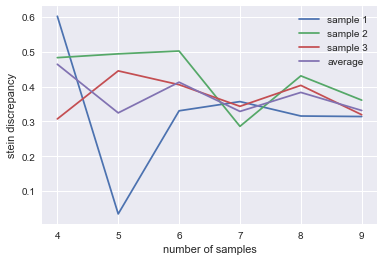

In [10]:
plt.plot(np.log2(n_samples), (stein_val), label='sample 1')
plt.plot(np.log2(n_samples), (stein_val_1), label='sample 2')
plt.plot(np.log2(n_samples), (stein_val_2), label='sample 3')
plt.plot(np.log2(n_samples), (stein_sum), label='average')
plt.legend(loc='upper right')

plt.xlabel('number of samples')
plt.ylabel('stein discrepancy')
plt.show()

# Add kolmogorov - smirnov statistics test
# add KL divergence test
# compare to wasserstein metric

In [11]:
# k = kernels('rbf')
# k_2 = kernels('imq')

# n = 1
# k.grad_kx( y=np.ones(n) ,x = np.ones(n))

# y = np.linspace(-10, 10, 500)
# plt.plot(y, [k.grad_kx(y = np.zeros(n), x=x_) for x_ in y], label='rbf')
# plt.plot(y, [k_2.grad_kx(y =np.zeros(n), x=x_) for x_ in y], label='imq')
# plt.legend(loc='upper right')
# plt.show()

# plt.plot(y, [k.rbf(np.zeros(n), x_) for x_ in y], label='rbf')
# plt.plot(y, [k.imq(np.zeros(n), x_,  beta=2) for x_ in y], label='imq')
# # plt.plot(y, [k.polynomial(x_, x_,  degree=2) for x_ in y], label='imq')

# plt.legend(loc='upper right')
# plt.show()

In [12]:
# f = lambda x,y: 0.5 * ((x-y)**2).sum()
# f = lambda x,y: k.rbf(x,y)

In [13]:
# def grad_fix_y(x_,y_):
#     f_x = lambda x: f(x, y_)
#     return grad(f_x)(x_)

# grad_fix_y(np.ones(2)*4. , np.ones(2)*2.)

In [14]:
# from autograd import jacobian
# def grad_xy(x_, y_):
#     f_y_gradx = lambda y: grad_fix_y(x_, y)
#     return jacobian(f_y_gradx)(y_)

# grad_xy(np.ones(2)*4. , np.ones(2)*2.)

In [15]:
# k.grad_kxy(np.ones(2)*4. , np.ones(2)*2.)

In [16]:
from ksd import ksd

sigma1 = np.array([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,3,0],
                   [0,0,0,1]])
mu1 = np.array([10. , 10. , 110. , 120.])

sigma2 = np.array([[10,0,0,0],
                   [0,20,0,0],
                   [0,0,3,1],
                   [0,0,1,1]])
mu2 = np.array([10. , 10. , 110. , 120.])

p_data = gaussian(dict(mu=mu1, sigma=sigma1))
q_var = gaussian(dict(mu=mu2, sigma=sigma2))

n_samples = 2**(np.arange(3,6))

array([ 1.13661939,  3.74517112,  2.17091056])

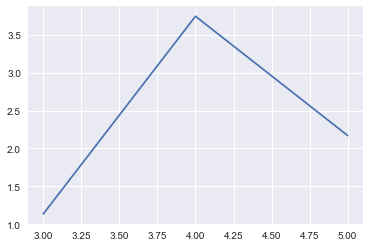

In [17]:

stein_rbf = ksd(dict(name='rbf', p=p_data, q=q_var))
stein_val_0 = np.array([stein_rbf.stein_Op(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), (stein_val_0))

stein_val_0

array([-81.8492683 , -24.92780947, -24.06602236])

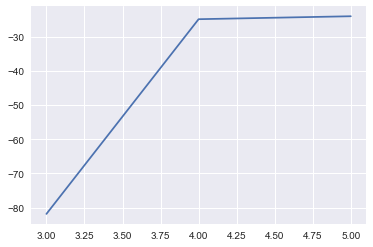

In [18]:

stein_imq = ksd(dict(name='imq', p=p_data, q=q_var))
stein_val_1 = np.array([stein_imq.stein_Op(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), (stein_val_1))
plt.show()

stein_val_1

# stein_poly = ksd(dict(name='polynomial', p=p_data, q=q_var))
# stein_val_2 = np.array([stein_poly.stein_Op(n_) for n_ in n_samples])
# plt.plot(np.log2(n_samples), (stein_val_2))

# stein_val_2

In [20]:
def mu(i):
    return mu1 + np.array([1. + 1./(1. + i) , 0. , 1./(1 + i), 0.])


# stein_imq = ksd(dict(name='imq', p=p_data, q=q_var))
# stein_val_1 = np.array([stein_imq.stein_Op(n_) for n_ in n_samples])
# plt.plot(np.log2(n_samples), (stein_val_1))
start_ , end_ = 10, 30

stein_val_i = []
for i in tqdm(range(start_, end_)):
    stein_ = ksd(dict(name='imq', p=p_data, q=gaussian(dict(mu=mu(i), sigma=sigma1))))
    stein_val_i.append(stein_.stein_Op(64))
    
# plt.plot(np.arange(start_, end_), abs(np.array(stein_val_i)))
plt.plot(np.arange(start_, end_), (stein_val_i))
plt.show()

# New kernel approach

In [ ]:
from stein_RRS import stein_RRS

sigma1 = np.array([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,3,1],
                   [0,0,1,1]])
mu1 = np.array([10. , 10. , 110. , 120.])

sigma2 = np.array([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,3,0],
                   [0,0,0,1]])
mu2 = np.array([10. , 10. , 110. , 120.])

p_data = gaussian(dict(mu=mu1, sigma=sigma1))
q_var = gaussian(dict(mu=mu2, sigma=sigma2))

n_samples = 2**(np.arange(3,14))

stein_rbf = stein_RRS(dict(name='rbf', p=p_data, q=q_var))
stein_val_0 = np.array([stein_rbf.stein_Op(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), (stein_val_0))

stein_val_0

  5%|▌         | 209/4096 [00:05<01:49, 35.66it/s]

In [ ]:
def mu(i):
    return mu1 + np.array([1. + 1./(1. + i) , 0. , 1./(1 + i), 0.])


# stein_imq = ksd(dict(name='imq', p=p_data, q=q_var))
# stein_val_1 = np.array([stein_imq.stein_Op(n_) for n_ in n_samples])
# plt.plot(np.log2(n_samples), (stein_val_1))
start_ , end_ = 10, 30

stein_val_i = []
stein_val_j = []


for i in tqdm(range(start_, end_)):
    stein_1 = ksd(dict(name='imq', p=p_data, q=gaussian(dict(mu=mu(i), sigma=sigma1)))).stein_Op(64)
    stein_val_i.append(stein_)

    stein_1 = stein_RRS(dict(name='imq', p=p_data, q=gaussian(dict(mu=mu(i), sigma=sigma1)))).stein_Op(64)
    stein_val_i.append(stein_)

    
    
# plt.plot(np.arange(start_, end_), abs(np.array(stein_val_i)))
plt.plot(np.arange(start_, end_), (stein_val_i))
plt.plot(np.arange(start_, end_), (stein_val_j))

plt.show()